<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>


# Pre-requisite

* Understanding of Python, Power BI or Tableau
* Understanding of Data Cleaning
* Understanding Data Visualization

#### Level of Exercise: Intermediate

#### Duration: approximately 3 hours


### Data Analytics of Airbnb Data:

#### Objective:

In this exericise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

YOu can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

This dataset contains information such as the neighborhood offering these services, room type, price,avaliabilty, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [1]:
## Read the csv file

import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/dribmai/Study_Datasets/main/Airbnb_Open_Data.csv'
airbnb_data = pd.read_csv(file_path, low_memory=False)

In [2]:
num_rows, num_columns = airbnb_data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 102599
Number of columns: 26


In [3]:
## Display the first 5 rows
airbnb_data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
## Display the data types
airbnb_data.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset.
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [5]:
#Drop some of the unwanted columns
unwanted_columns = ['host id', 'id', 'country', 'country code']
airbnb_data = airbnb_data.drop(columns=unwanted_columns)

###Drop some of the unwanted columns

`host id`, `id`: These columns are likely to be unique identifiers for hosts and listings. For analytical purposes, such identifiers may not provide meaningful insights into the overall patterns and trends within the data. Including them might add noise without contributing to the analysis.
`country` and `country code`: If the dataset is specific to a particular country or region (e.g., all listings are from a single country), these columns may not provide much variation in the data. If the analysis is focused on a specific location, it might be redundant to keep these columns.

## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [6]:
## Check for missing values in the dataframe and display the count in ascending order.
missing_values = airbnb_data.isnull().sum().sort_values(ascending=False)
print("Missing values count in ascending order:")
print(missing_values[missing_values > 0])

Missing values count in ascending order:
license                           102597
house_rules                        52131
last review                        15893
reviews per month                  15879
availability 365                     448
minimum nights                       409
host name                            406
review rate number                   326
calculated host listings count       319
host_identity_verified               289
service fee                          273
NAME                                 250
price                                247
Construction year                    214
number of reviews                    183
instant_bookable                     105
cancellation_policy                   76
neighbourhood group                   29
neighbourhood                         16
long                                   8
lat                                    8
dtype: int64


In [7]:
# Impute missing values based on data types
for column in airbnb_data.columns:
    if airbnb_data[column].isnull().any():
        if airbnb_data[column].dtype == 'object':
            # Impute missing values in object (string) columns with a placeholder (e.g., "Unknown")
            airbnb_data[column].fillna("Unknown", inplace=True)
        else:
            # Impute missing values in numeric columns with the mean of the column
            airbnb_data[column].fillna(airbnb_data[column].mean(), inplace=True)

# Verify that there are no missing values after imputation
print("\nMissing values count after imputation:")
print(airbnb_data.isnull().sum().sort_values(ascending=False))


Missing values count after imputation:
NAME                              0
host_identity_verified            0
house_rules                       0
availability 365                  0
calculated host listings count    0
review rate number                0
reviews per month                 0
last review                       0
number of reviews                 0
minimum nights                    0
service fee                       0
price                             0
Construction year                 0
room type                         0
cancellation_policy               0
instant_bookable                  0
long                              0
lat                               0
neighbourhood                     0
neighbourhood group               0
host name                         0
license                           0
dtype: int64


In [8]:
## Check whether there are any duplicate values in the dataframe and if present remove them.
duplicate_rows = airbnb_data.duplicated()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 3436


In [9]:
# Remove duplicates if present
airbnb_data_no_duplicates = airbnb_data.drop_duplicates()

In [10]:
## Display the total number of records in the dataframe after removing the duplicates.

# Print the number of rows and columns after removing duplicates
num_rows_no_duplicates, num_columns_no_duplicates = airbnb_data_no_duplicates.shape
print(f"Number of rows after removing duplicates: {num_rows_no_duplicates}")
print(f"Number of columns after removing duplicates: {num_columns_no_duplicates}")

Number of rows after removing duplicates: 99163
Number of columns after removing duplicates: 22


In [11]:
airbnb_data = airbnb_data_no_duplicates.copy()

## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [12]:
## Rename the column.
airbnb_data.rename(columns={'availability 365': 'days_booked'}, inplace=True)
airbnb_data.head()


,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,days_booked,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,...,$193,10.0,9.0,10/19/2021,0.210000,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,Unknown
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,...,$28,30.0,45.0,5/21/2022,0.380000,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,Unknown
2,THE VILLAGE OF HARLEM....NEW YORK !,Unknown,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,...,$124,3.0,0.0,Unknown,1.374022,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",Unknown
3,Unknown,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,...,$74,30.0,270.0,7/5/2019,4.640000,4.0,1.0,322.0,Unknown,Unknown
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,...,$41,10.0,9.0,11/19/2018,0.100000,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",Unknown


In [13]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
airbnb_data.columns = airbnb_data.columns.str.lower().str.replace(' ', '_')
airbnb_data.head()

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,...,$193,10.0,9.0,10/19/2021,0.210000,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,Unknown
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,...,$28,30.0,45.0,5/21/2022,0.380000,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,Unknown
2,THE VILLAGE OF HARLEM....NEW YORK !,Unknown,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,...,$124,3.0,0.0,Unknown,1.374022,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",Unknown
3,Unknown,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,...,$74,30.0,270.0,7/5/2019,4.640000,4.0,1.0,322.0,Unknown,Unknown
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,...,$41,10.0,9.0,11/19/2018,0.100000,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",Unknown


In [14]:

columns_with_special_characters = []

for column in airbnb_data.columns:
    if airbnb_data[column].dtype == 'object':  # Only check columns with object (string) data type
        if airbnb_data[column].str.contains('[\$,]').any():
            columns_with_special_characters.append(column)

In [15]:
columns_with_special_characters

['name', 'host_name', 'neighbourhood', 'price', 'service_fee', 'house_rules']

In [16]:
# I will remove the dollar sign and comma from 'price' and 'service_fee' columns
columns_to_clean = ['price', 'service_fee']

## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.
for column in columns_to_clean:
    airbnb_data[column] = pd.to_numeric(
        airbnb_data[column].replace('[\$,]', '', regex=True).replace('Unknown', pd.NaT),
        errors='coerce'
    )

# Display the first few rows of the updated dataframe
airbnb_data.head()

,name,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,days_booked,house_rules,license
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,...,193.0,10.0,9.0,10/19/2021,0.210000,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,Unknown
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,...,28.0,30.0,45.0,5/21/2022,0.380000,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,Unknown
2,THE VILLAGE OF HARLEM....NEW YORK !,Unknown,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,...,124.0,3.0,0.0,Unknown,1.374022,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",Unknown
3,Unknown,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,...,74.0,30.0,270.0,7/5/2019,4.640000,4.0,1.0,322.0,Unknown,Unknown
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,...,41.0,10.0,9.0,11/19/2018,0.100000,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",Unknown


### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [17]:
## List the count of various room types avaliable with Airbnb
room_type_counts = airbnb_data['room_type'].value_counts()

# Display the count of various room types
print("Count of various room types available with Airbnb:")
room_type_counts


Count of various room types available with Airbnb:


Entire home/apt    52003
Private room       44895
Shared room         2150
Hotel room           115
Name: room_type, dtype: int64

In [18]:
## Which room type adheres to more strict cancellation policy
room_type_cancellation_counts = airbnb_data.groupby(['room_type', 'cancellation_policy']).size().unstack(fill_value=0)

# Display the counts of cancellation policies for each room type
print("Counts of cancellation policies for each room type:")
print(room_type_cancellation_counts)

Counts of cancellation policies for each room type:
cancellation_policy  Unknown  flexible  moderate  strict
room_type                                               
Entire home/apt           50     17368     17344   17241
Hotel room                 0        44        37      34
Private room              23     14834     15101   14937
Shared room                3       714       715     718


In [19]:
# Identify the cancellation policy with the highest count for each room type
strict_cancellation_policy = room_type_cancellation_counts.idxmax(axis=1)

# Display the room type with the strictest cancellation policy
print("\nRoom type with the strictest cancellation policy:")
print(strict_cancellation_policy)


Room type with the strictest cancellation policy:
room_type
Entire home/apt    flexible
Hotel room         flexible
Private room       moderate
Shared room          strict
dtype: object


In [20]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
unique_neighbourhood_groups = airbnb_data['neighbourhood_group'].unique()
unique_neighbourhood_groups

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens',
       'Unknown', 'Staten Island', 'Bronx'], dtype=object)

In [21]:
airbnb_data['neighbourhood_group'] = airbnb_data['neighbourhood_group'].replace('manhatan', 'Manhattan', regex=True)

In [22]:
airbnb_data['neighbourhood_group'] = airbnb_data['neighbourhood_group'].replace('brookln', 'Brooklyn', regex=True)

In [23]:
prices_by_neighbourhood = airbnb_data.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)

# Display the prices by neighborhood group
print("Prices by Neighborhood Group:")
print(prices_by_neighbourhood)

Prices by Neighborhood Group:
neighbourhood_group
Unknown          658.357143
Queens           629.712735
Bronx            626.614412
Staten Island    626.431843
Brooklyn         626.427040
Manhattan        622.679932
Name: price, dtype: float64


In [24]:
# Identify the most expensive neighborhood group
most_expensive_neighborhood = prices_by_neighbourhood.idxmax()
most_expensive_price = prices_by_neighbourhood.max()

# Display the most expensive neighborhood group
print("\nMost Expensive Neighborhood Group:")
print(f"{most_expensive_neighborhood} is the most expensive neighborhood group with an average price of ${most_expensive_price:.2f}")



Most Expensive Neighborhood Group:
Unknown is the most expensive neighborhood group with an average price of $658.36


## Task 5a: Data Visualization (Any Tool)

* List the count of various room types avaliable with Airnb
* Which room type adheres to more strict cancellation policy
* List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
* List the top 10 neighborhoods in the increasing order of their price with the help of a horizontal bar graph. Which is the cheapest neighborhood.
* List the neighborhoods which offer short term rentals within 10 days. Illustrate with a bar graph
* List the prices with respect to room type using a bar graph and also state your inferences.
* Create a pie chart that shows  distribution of booked days for each neighborhood group .Which neighborhood has the highest booking percentage.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

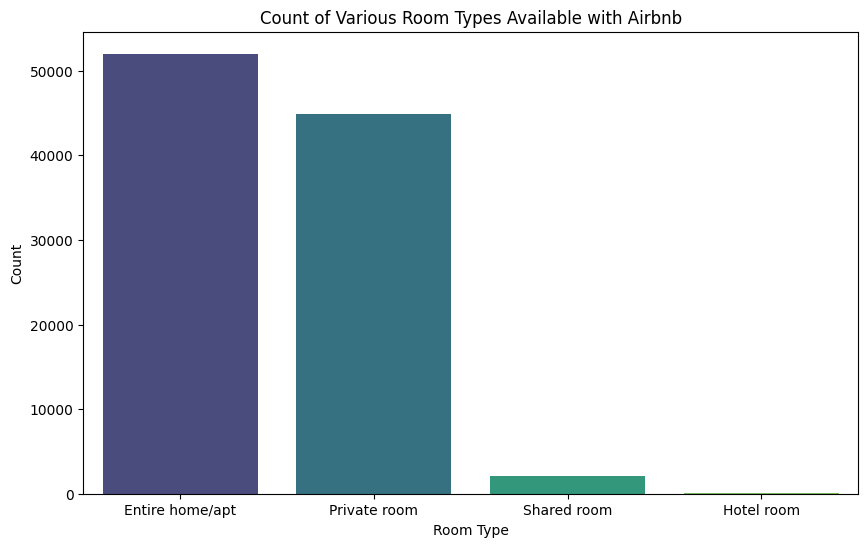

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count of various room types
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='viridis')
plt.title('Count of Various Room Types Available with Airbnb')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


<Figure size 1200x800 with 0 Axes>

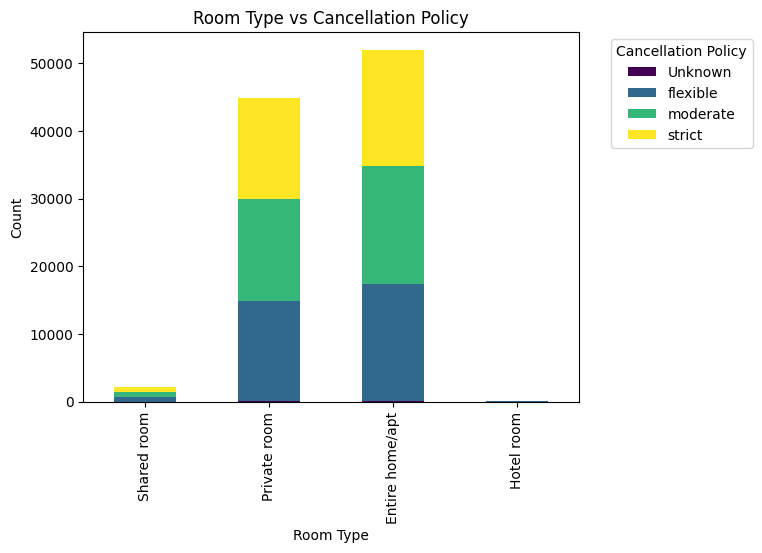

In [26]:
# Find the most common cancellation policy for each room type
most_common_cancellation = room_type_cancellation_counts.idxmax(axis=1).sort_values(ascending=False)

# Sort the DataFrame based on the most common cancellation policy
room_type_cancellation_counts_sorted = room_type_cancellation_counts.loc[most_common_cancellation.index]

# Plot a stacked bar plot
plt.figure(figsize=(12, 8))
room_type_cancellation_counts_sorted.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Room Type vs Cancellation Policy')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='Cancellation Policy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

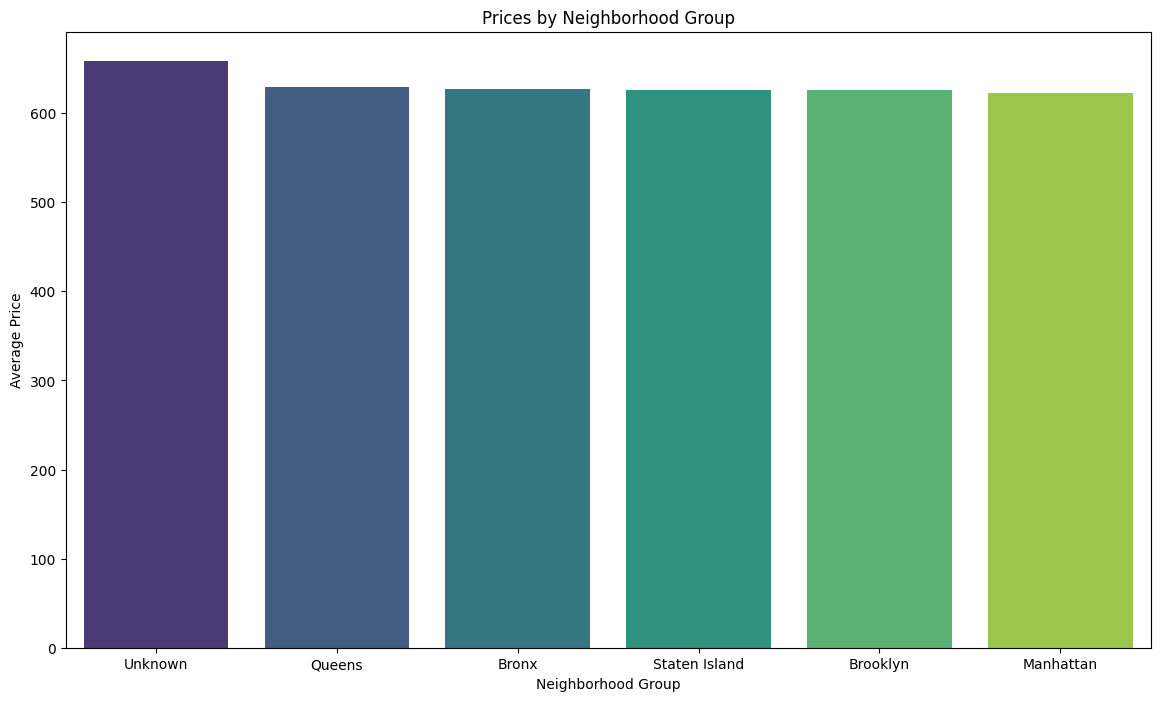

In [27]:
#List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
plt.figure(figsize=(14, 8))

# Plot a bar plot in descending order of average price
sns.barplot(x=prices_by_neighbourhood.index, y=prices_by_neighbourhood.values, palette='viridis')

plt.title('Prices by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.show()


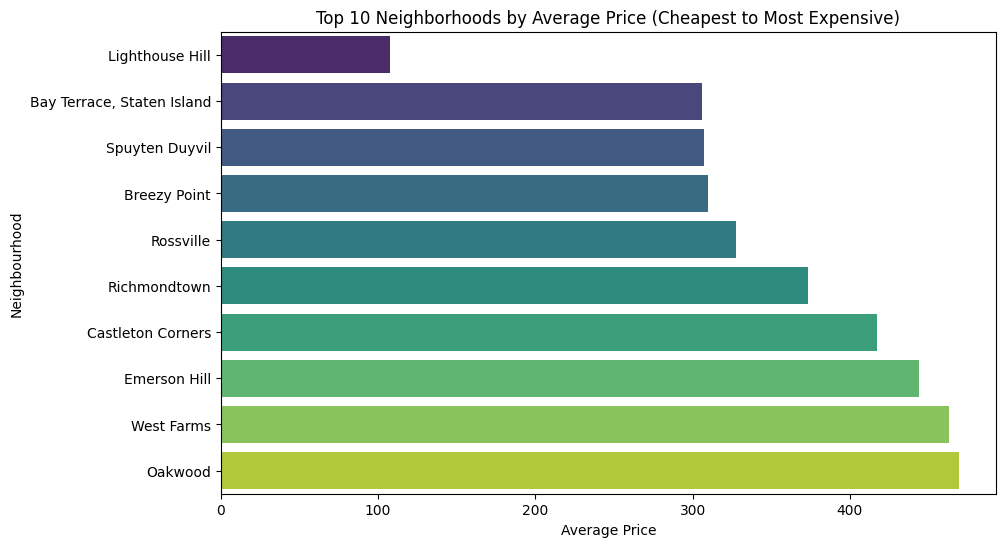

The cheapest neighborhood is 'Lighthouse Hill' with an average price of $107.67


In [28]:
#List the top 10 neighborhoods in the increasing order of their price with the help of a horizontal bar graph. Which is the cheapest neighborhood.

top_10_neighborhoods = airbnb_data.groupby('neighbourhood')['price'].mean().sort_values().head(10)

# Plot a horizontal bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_neighborhoods.values, y=top_10_neighborhoods.index, palette='viridis')

plt.title('Top 10 Neighborhoods by Average Price (Cheapest to Most Expensive)')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.show()

# Identify the cheapest neighborhood
cheapest_neighborhood = top_10_neighborhoods.idxmin()
cheapest_price = top_10_neighborhoods.min()

# Print the cheapest neighborhood
print(f"The cheapest neighborhood is '{cheapest_neighborhood}' with an average price of ${cheapest_price:.2f}")


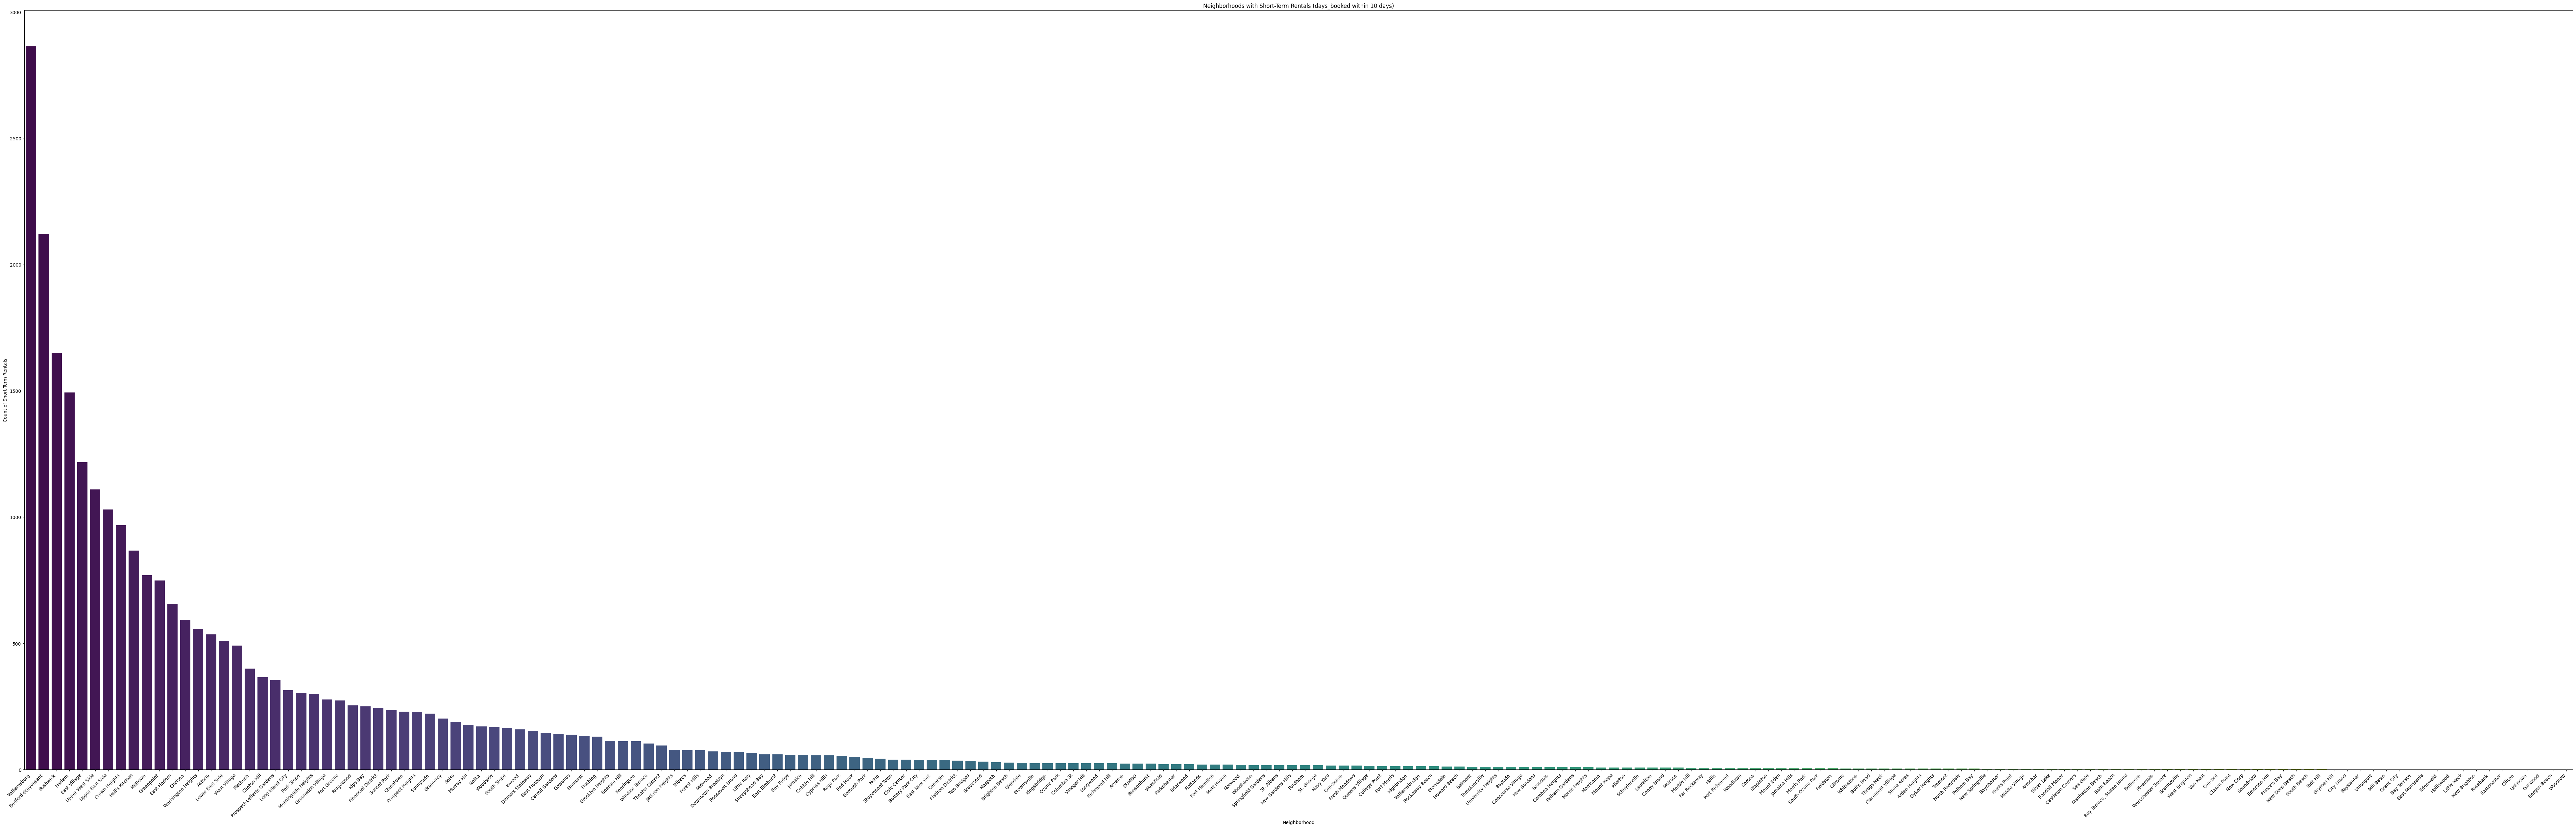

Neighborhoods with short-term rentals (days_booked within 10 days):
['Williamsburg', 'Bedford-Stuyvesant', 'Bushwick', 'Harlem', 'East Village', 'Upper West Side', 'Upper East Side', 'Crown Heights', "Hell's Kitchen", 'Midtown', 'Greenpoint', 'East Harlem', 'Chelsea', 'Washington Heights', 'Astoria', 'Lower East Side', 'West Village', 'Flatbush', 'Clinton Hill', 'Prospect-Lefferts Gardens', 'Long Island City', 'Park Slope', 'Morningside Heights', 'Greenwich Village', 'Fort Greene', 'Ridgewood', 'Kips Bay', 'Financial District', 'Sunset Park', 'Chinatown', 'Prospect Heights', 'Sunnyside', 'Gramercy', 'SoHo', 'Murray Hill', 'Nolita', 'Woodside', 'South Slope', 'Inwood', 'Ditmars Steinway', 'East Flatbush', 'Carroll Gardens', 'Gowanus', 'Elmhurst', 'Flushing', 'Brooklyn Heights', 'Boerum Hill', 'Kensington', 'Windsor Terrace', 'Theater District', 'Jackson Heights', 'Tribeca', 'Forest Hills', 'Midwood', 'Downtown Brooklyn', 'Roosevelt Island', 'Little Italy', 'Sheepshead Bay', 'East Elmhur

In [29]:
#List the neighborhoods which offer short term rentals within 10 days. Illustrate with a bar graph

short_term_neighbourhoods = airbnb_data[airbnb_data['days_booked'] <= 10]['neighbourhood'].value_counts()

# Plot a bar graph
plt.figure(figsize=(100, 30))
sns.barplot(x=short_term_neighbourhoods.index, y=short_term_neighbourhoods.values, palette='viridis')

plt.title('Neighborhoods with Short-Term Rentals (days_booked within 10 days)')
plt.xlabel('Neighborhood')
plt.ylabel('Count of Short-Term Rentals')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# List the neighborhoods with short-term rentals
print("Neighborhoods with short-term rentals (days_booked within 10 days):")
print(short_term_neighbourhoods.index.tolist())


In [30]:
import plotly.express as px

# Assuming 'neighborhood' and 'availability_365' are the relevant columns
short_term_neighborhoods = airbnb_data[airbnb_data['days_booked'] <= 10]['neighbourhood'].value_counts()

# Create an interactive bar plot
fig = px.bar(x=short_term_neighborhoods.index, y=short_term_neighborhoods.values,
             labels={'x': 'Neighbourhood', 'y': 'Count of Short-Term Rentals'},
             title='Neighborhoods with Short-Term Rentals (days_booked within 10 days)',
             template='plotly', width=1000)

# Customize the layout for better visibility
fig.update_layout(xaxis=dict(tickangle=45, tickmode='array', tickvals=list(range(len(short_term_neighbourhoods))), ticktext=short_term_neighbourhoods.index),
                  xaxis_title='Neighbourhood', yaxis_title='Count of Short-Term Rentals')

# Show the interactive plot
fig.show()


In [31]:
import plotly.express as px

# Assuming 'neighborhood' and 'availability_365' are the relevant columns
short_term_neighborhoods = airbnb_data[airbnb_data['days_booked'] <= 10]['neighbourhood'].value_counts().head(10)

# Create an interactive bar plot with scrollable x-axis
fig = px.bar(x=short_term_neighborhoods.index, y=short_term_neighborhoods.values, labels={'x': 'Neighbourhood', 'y': 'Count of Short-Term Rentals'},
             title='Top Neighbourhoods with Short-Term Rentals (days_booked within 10 days)',
             template='plotly', width=1000)

# Customize the layout for better visibility
fig.update_layout(xaxis=dict(tickangle=45, tickmode='array', tickvals=list(range(10)), ticktext=short_term_neighbourhoods.index),
                  xaxis_title='Neighbourhood', yaxis_title='Count of Short-Term Rentals')

# Show the interactive plot
fig.show()

<ipython-input-32-fb23fe9a4889>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




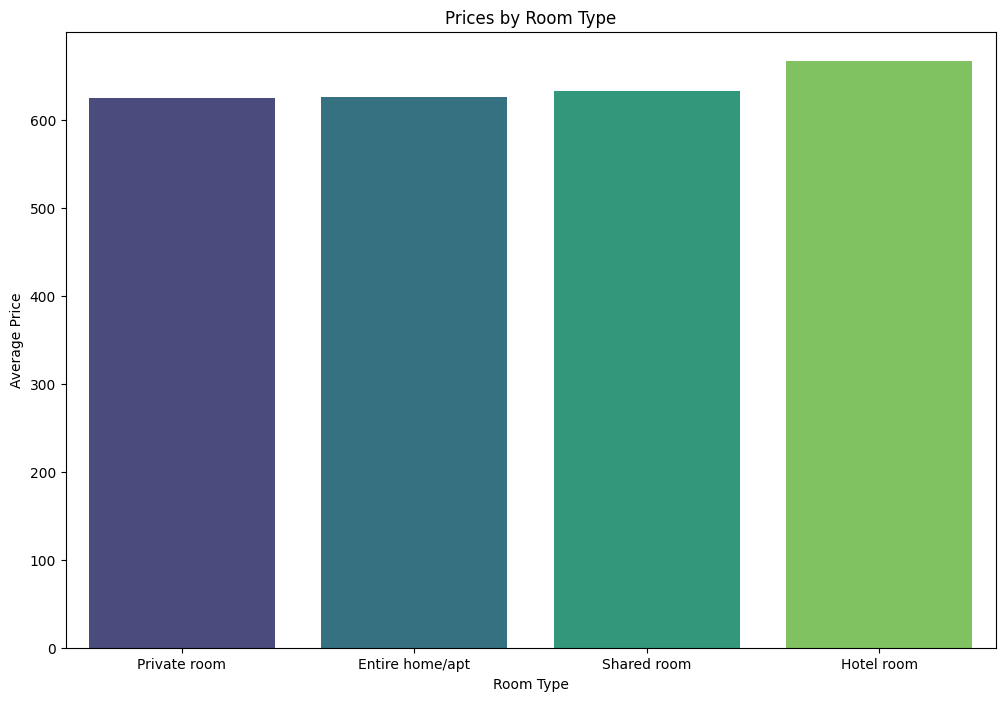

In [32]:
#List the prices with respect to room type using a bar graph and also state your inferences.

plt.figure(figsize=(12, 8))
sns.barplot(x='room_type', y='price', data=airbnb_data, palette='viridis', ci=None)

plt.title('Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()


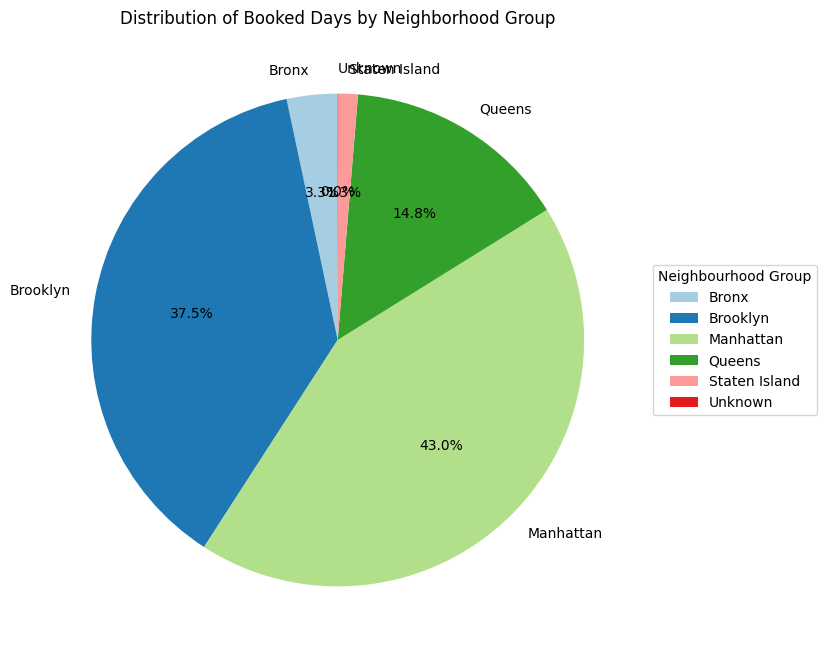

The neighbourhood with the highest booking percentage is 'Manhattan' with 43.0%.


In [33]:
#Create a pie chart that shows distribution of booked days for each neighborhood group .Which neighborhood has the highest booking percentage.
booking_distribution = airbnb_data.groupby('neighbourhood_group')['days_booked'].sum()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(booking_distribution, labels=booking_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Distribution of Booked Days by Neighborhood Group')

# Move legend outside the pie chart to avoid label overlapping
plt.legend(booking_distribution.index, title='Neighbourhood Group', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# Identify the neighborhood with the highest booking percentage
highest_booking_neighbourhood = booking_distribution.idxmax()
highest_booking_percentage = (booking_distribution[highest_booking_neighbourhood] / booking_distribution.sum()) * 100

print(f"The neighbourhood with the highest booking percentage is '{highest_booking_neighbourhood}' with {highest_booking_percentage:.1f}%.")


## Task 5b: Data Visualization (Any Tool)

* Does service price and room price have an impact on each other. Illustrate this relationship with a scatter plot and state your inferences
* Using a line graph show in which year the maximum construction of rooms took place.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

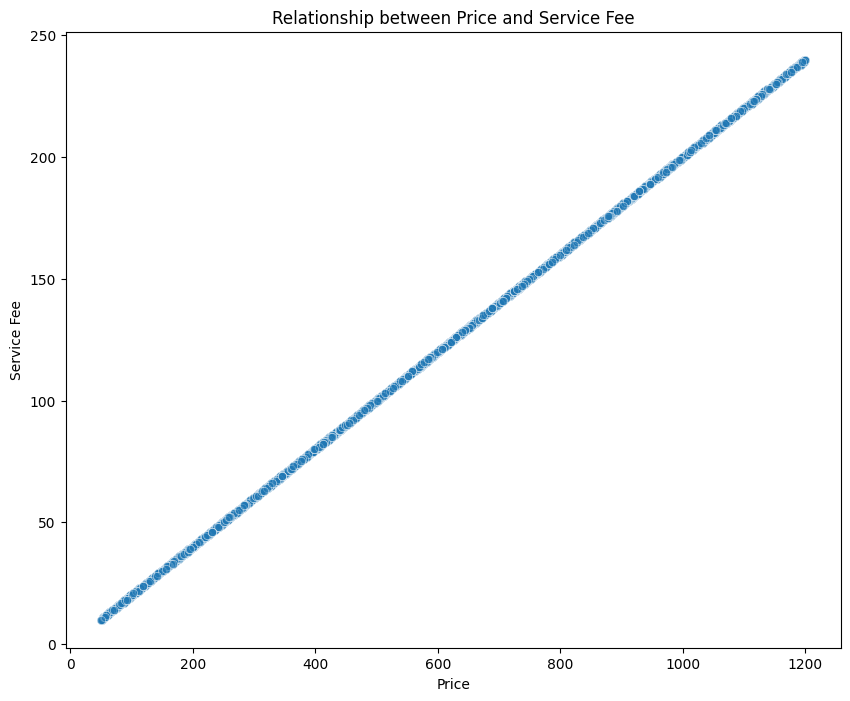

In [34]:
#Does service price and room price have an impact on each other. Illustrate this relationship with a scatter plot and state your inferences
plt.figure(figsize=(10, 8))
sns.scatterplot(x='price', y='service_fee', data=airbnb_data, alpha=0.6)

plt.title('Relationship between Price and Service Fee')
plt.xlabel('Price')
plt.ylabel('Service Fee')
plt.show()



In [35]:
correlation_coefficient = airbnb_data['price'].corr(airbnb_data['service_fee'])
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.9999908800429926


#Yes, definitely service price and room price have an impact on each other

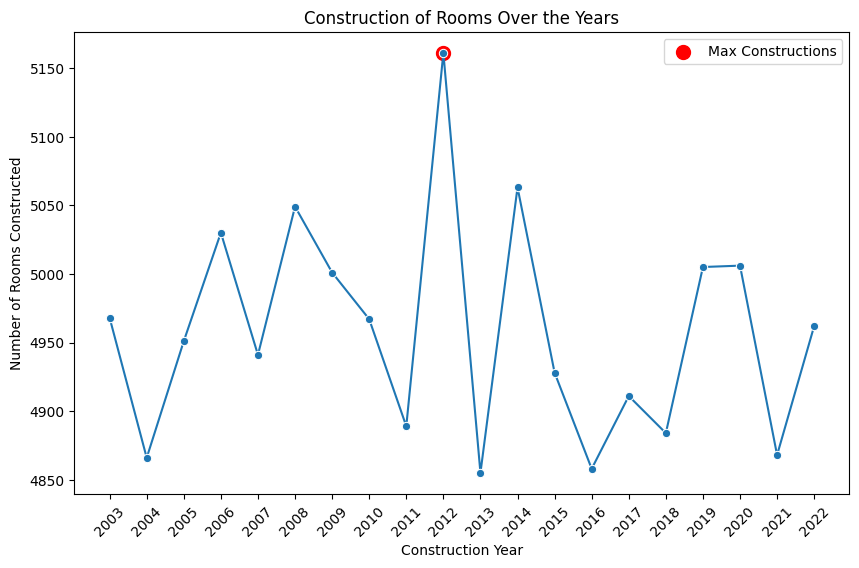

In [36]:
airbnb_data['construction_year'] = pd.to_datetime(airbnb_data['construction_year'], format='%Y', errors='coerce')

construction_year_counts = airbnb_data['construction_year'].value_counts().sort_index()

# Aggregate counts by year
construction_year_aggregated = construction_year_counts.resample('Y').sum()

# Find the year with the maximum construction
max_construction_year = construction_year_aggregated.idxmax()
max_construction_count = construction_year_aggregated.max()

# Create a line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=construction_year_aggregated.index.year, y=construction_year_aggregated.values, marker='o')

# Highlight the point with the maximum value
plt.scatter(max_construction_year.year, max_construction_count, color='red', s=100, label='Max Constructions')

plt.title('Construction of Rooms Over the Years')
plt.xlabel('Construction Year')
plt.ylabel('Number of Rooms Constructed')

# Show only full years on the x-axis
plt.xticks(construction_year_aggregated.index.year, rotation=45)

# Display legend
plt.legend()

plt.show()


## Task 5c: Data Visualization (Any Tool)

* With the help of box plots illustrate the following
 * Effect of Review Rate number on price
 * Effect of host identity verified on price

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

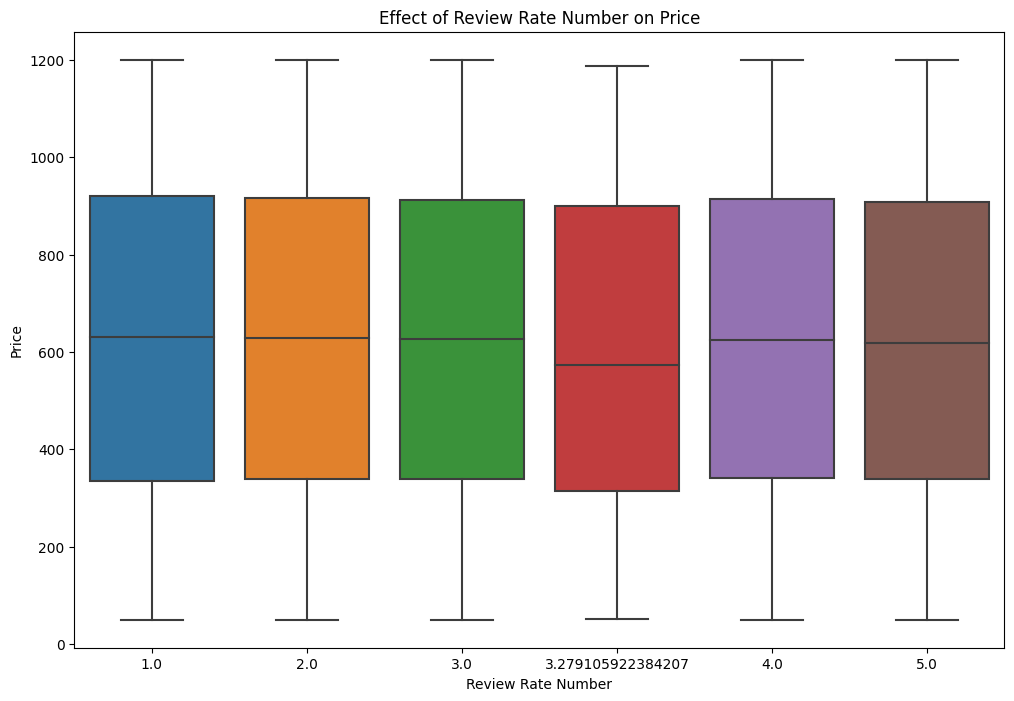

In [37]:
#Effect of Review Rate number on price
plt.figure(figsize=(12, 8))
sns.boxplot(x='review_rate_number', y='price', data=airbnb_data)

plt.title('Effect of Review Rate Number on Price')
plt.xlabel('Review Rate Number')
plt.ylabel('Price')
plt.show()


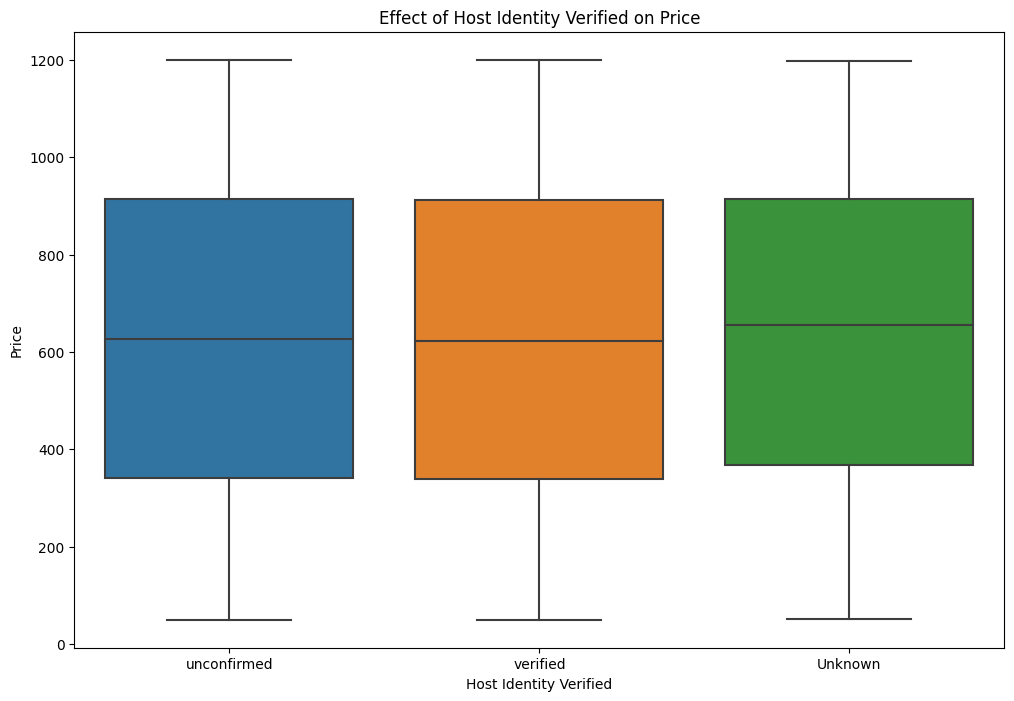

In [38]:
#Effect of host identity verified on price
plt.figure(figsize=(12, 8))
sns.boxplot(x='host_identity_verified', y='price', data=airbnb_data)

plt.title('Effect of Host Identity Verified on Price')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.show()
